In [1]:
%pip install opencv-python
%pip install scikit-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report

In [3]:
%pip install tensorflow

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.



In [5]:
dataset_dir = "C:/Users/Parishee Agarwal/Desktop/Sign-Language-Detection--main/Sign Language for 0-9 a-z"


In [6]:
num_images_per_class = 50

images = []
labels = []

In [7]:
for class_name in os.listdir(dataset_dir):
    class_dir = os.path.join(dataset_dir, class_name)
    if os.path.isdir(class_dir):
        label = class_name
        print(label)

        # Counter for images taken from each class
        count = 0

        for image_file in os.listdir(class_dir):
            if count >= num_images_per_class:
                break  # Break out of the loop if reached the limit
            image_path = os.path.join(class_dir, image_file)
            image = cv2.imread(image_path)
            image = cv2.resize(image, (224,224))
            cv2.imshow("image", image)
            cv2.waitKey(20)
            image = image / 255.0
            images.append(image)
            labels.append(label)
            count += 1
        
        cv2.destroyAllWindows()

images = np.array(images)
labels = np.array(labels)

print(images.shape)
print(labels.shape)


0
1
2
3
4
5
6
7
8
a
b
c
d
e
f
g
h
i
j
k
l
m
n
o
p
q
r
s
t
u
v
w
x
y
z
(1750, 224, 224, 3)
(1750,)


In [8]:
# Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)



In [9]:
x_train, x_test, y_train_encoded, y_test_encoded = train_test_split(images, labels_encoded, test_size=0.2, random_state=42)
print(y_train_encoded)


[ 3 25 34 ... 17 29 22]


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the input shape
input_shape = (224, 224, 3)

# Create a Sequential model
model = Sequential()

# Add the first convolutional layer with input shape specified
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D((2, 2)))

# Add more layers as needed
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Flatten the output before feeding into dense layers
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(36, activation='softmax'))




In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [18]:
hist = model.fit(x_train, y_train_encoded, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 31s 827ms/step - accuracy: 0.7981 - loss: 0.7587 - val_accuracy: 0.6357 - val_loss: 1.4738
Epoch 2/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 788ms/step - accuracy: 0.7995 - loss: 0.7043 - val_accuracy: 0.6750 - val_loss: 1.3828
Epoch 3/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 774ms/step - accuracy: 0.8691 - loss: 0.4792 - val_accuracy: 0.7071 - val_loss: 1.9114
Epoch 4/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 793ms/step - accuracy: 0.8793 - loss: 0.4295 - val_accuracy: 0.7214 - val_loss: 1.6529
Epoch 5/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 803ms/step - accuracy: 0.9230 - loss: 0.2681 - val_accuracy: 0.7214 - val_loss: 1.8783
Epoch 6/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 27s 757ms/step - accuracy: 0.9347 - loss: 0.2141 - val_accuracy: 0.7036 - val_loss: 1.8277
Epoch 7/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 34s 980ms/step - accuracy: 0.9411 - loss: 0.1986 - val_accuracy: 0.7286 - val_loss: 1.6462
Epoch 8/10
35/35 ━━━━━━━━━━━━━━━━━━━━ 28s 783ms/step - accuracy: 0.9407 - loss: 0.2122 - val_accu

In [19]:
model.save('keras_model.h5')


In [20]:
test_loss, test_accuracy = model.evaluate(x_test, y_test_encoded)
print(f'Test accuracy: {test_accuracy}')

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 161ms/step - accuracy: 0.7359 - loss: 2.8356
Test accuracy: 0.7599999904632568


In [21]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 164ms/step


In [22]:
accuracy = accuracy_score(y_test_encoded, y_pred_classes)
precision = precision_score(y_test_encoded, y_pred_classes, average='weighted')
recall = recall_score(y_test_encoded, y_pred_classes, average='weighted')
f1 = f1_score(y_test_encoded, y_pred_classes, average='weighted')
confustion_matrix = confusion_matrix(y_test_encoded, y_pred_classes)

In [23]:


print("Confusion matrix:")
print(confustion_matrix)

Confusion matrix:
[[ 7  0  0 ...  0  0  0]
 [ 0 10  0 ...  0  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 0  0  0 ... 14  0  0]
 [ 0  0  0 ...  0 12  0]
 [ 0  0  0 ...  0  0 12]]


In [24]:
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')

Accuracy: 0.76
Precision: 0.7743065616233318
Recall: 0.76
F1 Score: 0.7583506699353572


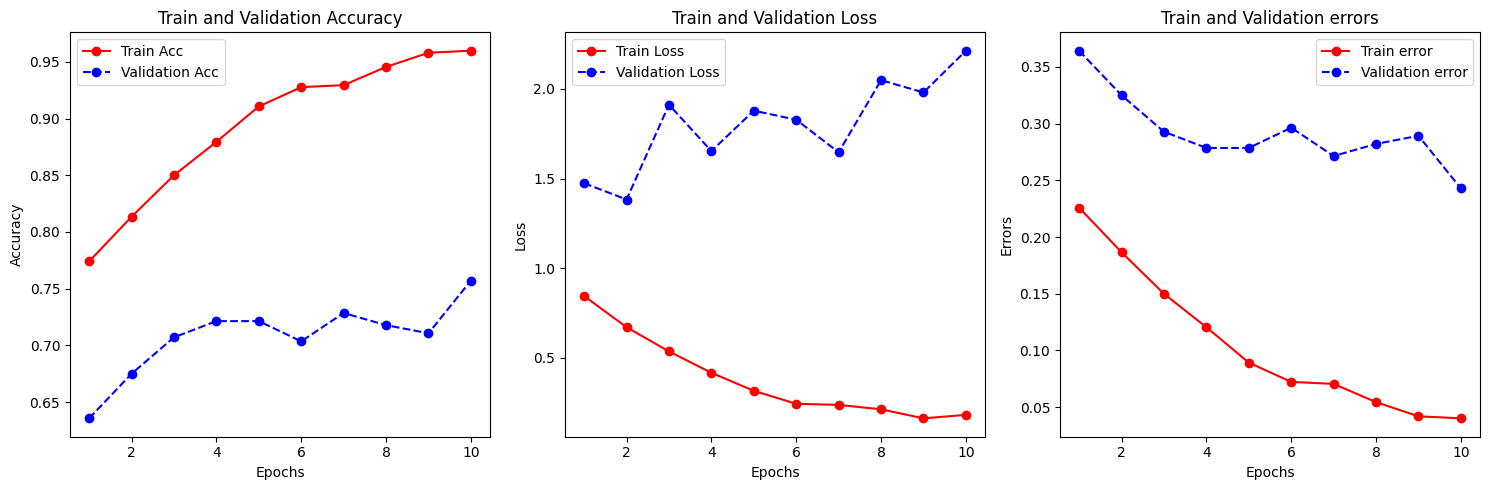

In [28]:
import matplotlib.pyplot as plt

epochs = range(1, 11)  # Assuming 10 epochs
train_errors = [1 - acc for acc in hist.history['accuracy']]
vall_errors = [1 - acc for acc in hist.history['val_accuracy']]
train_loss = hist.history['loss']
vall_loss = hist.history['val_loss']

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# Plotting train and validation accuracy
ax[0].plot(epochs, hist.history['accuracy'], 'r-o', label='Train Acc')
ax[0].plot(epochs, hist.history['val_accuracy'], 'b--o', label='Validation Acc')
ax[0].set_title('Train and Validation Accuracy')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('Accuracy')
ax[0].legend()

# Plotting train and validation loss
ax[1].plot(epochs, train_loss, 'r-o', label='Train Loss')
ax[1].plot(epochs, vall_loss, 'b--o', label='Validation Loss')
ax[1].set_title('Train and Validation Loss')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Loss')
ax[1].legend()

# Plotting train and validation errors
ax[2].plot(epochs, train_errors, 'r-o', label='Train error')
ax[2].plot(epochs, vall_errors, 'b--o', label='Validation error')
ax[2].set_title('Train and Validation errors')
ax[2].set_xlabel('Epochs')
ax[2].set_ylabel('Errors')
ax[2].legend()

plt.tight_layout()
plt.show()


In [29]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 173056)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │    11,075,648 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 36)             │         2,340 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,402,926 (127.42 MB)

 Trainable params: 11,134,308 (42.47 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 22,268,618 (84.95 MB)